In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras import datasets

(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()

In [3]:
batch_size= 8

In [4]:
t_img= train_x[0:batch_size]
t_img.shape

(8, 28, 28)

In [5]:
t_img = t_img[...,tf.newaxis]
t_img.shape, t_img.dtype

((8, 28, 28, 1), dtype('uint8'))

In [6]:
t_img=t_img.astype(dtype=np.float32)
t_img.dtype

dtype('float32')

In [7]:
act_layer= tf.keras.layers.ReLU()
act_output= act_layer(t_img)

In [8]:
act_output.shape

TensorShape([8, 28, 28, 1])

In [9]:
pool_layer= tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='SAME')
pool_output= pool_layer(act_output)
pool_output.shape, pool_output.dtype

(TensorShape([8, 14, 14, 1]), tf.float32)

In [10]:
# pool_layer= tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='SAME')
# pool_output= pool_layer(act_output)
# pool_output.shape, 

## fully connected layer(dense layer), FC layer

In [11]:
flatten_layer =tf.keras.layers.Flatten()
flatten_output=flatten_layer(pool_output)
flatten_output.shape

TensorShape([8, 196])

In [12]:
dense_layer1=tf.keras.layers.Dense(128,activation='relu')
dense_output1=dense_layer1(flatten_output)

In [13]:
dense_layer2=tf.keras.layers.Dense(32,activation='relu')
dense_output2=dense_layer2(dense_output1)

In [14]:
dense_layer3=tf.keras.layers.Dense(16,activation='relu')
dense_output3=dense_layer3(dense_output2)

In [15]:
dense_output1.shape, dense_output2.shape, dense_output3.shape

(TensorShape([8, 128]), TensorShape([8, 32]), TensorShape([8, 16]))

In [16]:
drop_layer=tf.keras.layers.Dropout(0.25)
drop_output=drop_layer(dense_output3)
drop_output.shape

TensorShape([8, 16])

In [17]:
drop_output.shape, dense_output3.shape

(TensorShape([8, 16]), TensorShape([8, 16]))

## 모델 만들기

In [18]:
from tensorflow.keras import layers

In [19]:
input_shape=(28,28,1)#모델 만들 때,batch_size는 고려하지 않음(height, width,channels)
num_classes=10

In [25]:
inputs= layers.Input(shape=input_shape) #inputlayer
#cv_layer1=layers.Conv2D(filters=32, kernel_size=(3,3),padding='SAME')
cv_layer1=layers.Conv2D(32,3,1,padding='SAME')
cv_1_output=cv_layer1(inputs)

cv1_act_layer= layers.Activation('relu')
cv_1_act_output=cv1_act_layer(cv_1_output)

In [26]:
cv_layer2=layers.Conv2D(32,3,1,padding='SAME')
cv_2_output=cv_layer2(cv_1_act_output)

cv2_act_layer= layers.Activation('relu')
cv_2_act_output=cv2_act_layer(cv_2_output)

In [27]:
cv_layer3=layers.Conv2D(32,3,1,padding='SAME')
cv_3_output=cv_layer2(cv_2_act_output)

cv3_act_layer= layers.Activation('relu')
cv_3_act_output=cv3_act_layer(cv_3_output)

### 간단한 모양으로 표현하기

In [28]:
cv_1_ouput=layers.Conv2D(32,3,1,padding='SAME')(inputs)
cv_1_act_output= layers.Activation('relu')(cv_1_output)

In [29]:
cv_2_ouput=layers.Conv2D(32,3,1,padding='SAME')(cv_1_act_output)
cv_2_act_output= layers.Activation('relu')(cv_2_output)

In [30]:
cv_3_ouput=layers.Conv2D(32,3,1,padding='SAME')(cv_2_act_output)
cv_3_act_output= layers.Activation('relu')(cv_3_output)

### 더 간단한 모양

In [103]:
def mymodel(input_shape, num_classes):
    inputs= layers.Input(shape=input_shape)

    #cnn의 역할: feature extraction, feature map을 만들어주는 역할 
    net = layers.Conv2D(32,3,1,padding='SAME')(inputs)
    net = layers.Activation('relu')(net)
    net = layers.MaxPool2D(pool_size=(2,2))(net)
    net = layers.Dropout(0.25)(net)

    net = layers.Conv2D(32,3,1,padding='SAME')(net)
    net = layers.Activation('relu')(net)
    net = layers.MaxPool2D(pool_size=(2,2))(net)
    net = layers.Dropout(0.25)(net)#학습시에만 사용됨

    net = layers.Conv2D(16,3,1,padding='SAME')(net)
    net = layers.Activation('relu')(net)
    net = layers.MaxPool2D(pool_size=(2,2))(net)
    net = layers.Dropout(0.25)(net)

    net = layers.Conv2D(8,3,1,padding='SAME')(net)
    net = layers.Activation('relu')(net)
    net = layers.MaxPool2D(pool_size=(2,2))(net)
    net = layers.Dropout(0.25)(net)

    net = layers.Flatten()(net) #2D->1D

    net = layers.Dense(512)(net)
    net = layers.Activation('relu')(net)
    net = layers.Dropout(0.25)(net)

    net = layers.Dense(128)(net)
    net = layers.Activation('relu')(net)
    net = layers.Dropout(0.25)(net)

    net = layers.Dense(num_classes)(net)
    net = layers.Activation('softmax')(net)#0-1사이로 만들어줌

    model = tf.keras.Model(inputs=inputs, outputs= net, name='test')
    
    return model

In [104]:
model=mymodel(input_shape, num_classes)
model.summary() 
#para:((3*3*32)+1)*32

Model: "test"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
activation_35 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
activation_36 (Activation)   (None, 14, 14, 32)        0      

In [43]:
# train_img = train_x[0:batch_size]

# train_img.shape

# train_img= np.expand_dims(train_img, axis=-1) #train_img=train_img[...,tf.newaxis]
# train_img.shape

# train_img = train_img.astype(np.float32)
# train_img.dtype

# np.max(train_img), np.min(train_img)

# plt.imshow(train_img[0,:,:,0],'gray')

In [51]:
train_x.shape, train_y.shape

((60000, 28, 28), (60000,))

In [52]:
train_y[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

0

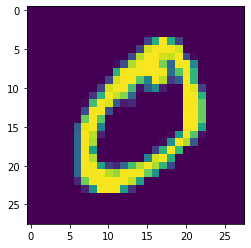

In [53]:
plt.imshow(train_x[1])
train_y[1]

In [54]:
train_x_4d = train_x[...,tf.newaxis]
train_x_4d.shape

(60000, 28, 28, 1)

In [55]:
train_x_4d = train_x_4d /255 #0과 1사이의 값으로 scaling
np.max(train_x_4d), np.min(train_x_4d)

(1.0, 0.0)

In [56]:
train_x_4d.dtype

dtype('float64')

In [99]:
def mymodel2(input_shape):
    inputs= layers.Input(shape=input_shape)

    #cnn의 역할: feature extraction, feature map을 만들어주는 역할 
    net = layers.Conv2D(32,3,1,padding='SAME')(inputs)
    net = layers.Activation('relu')(net)
    net = layers.Conv2D(32,3,1,padding='SAME')(net)
    net = layers.Activation('relu')(net)
    net = layers.MaxPool2D(pool_size=(2,2))(net)
    net = layers.Dropout(0.25)(net)

    net = layers.Conv2D(64,3,1,padding='SAME')(net)
    net = layers.Activation('relu')(net)
    net = layers.Conv2D(64,3,1,padding='SAME')(net)
    net = layers.Activation('relu')(net)
    net = layers.MaxPool2D(pool_size=(2,2))(net)
    net = layers.Dropout(0.25)(net)

    net = layers.Flatten()(net) #2D->1D
    net = layers.Dense(512)(net)
    net = layers.Activation('relu')(net)
    net = layers.Dropout(0.25)(net)
#     net = layers.Dense(128)(net)
#     net = layers.Activation('relu')(net)
    net = layers.Dense(num_classes)(net)
    net = layers.Activation('softmax')(net)

    model = tf.keras.Model(inputs=inputs, outputs= net, name='test')
    return model

In [100]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [102]:
num_epoch = 1
batch_size= 32#메모리 오류나면 숫자를 줄여보기
hist = model.fit(train_x_4d, train_y, batch_size= batch_size, shuffle=True, epochs=num_epoch)

1875/1875 [==============================] - 105s 56ms/step - loss: 0.3071 - accuracy: 0.9133s - loss: 0.3072 - accura - ETA: 0s - loss: 0.3071 


In [81]:
test_x.shape, test_y.shape

((10000, 28, 28), (10000,))

In [82]:
test_y[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

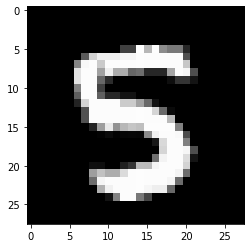

In [94]:
plt.imshow(test_x[120],'gray')
plt.show()

In [95]:
pred = model.predict(test_x[120].reshape(1,28,28,1))
pred

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        7.2818605e-29, 0.0000000e+00]], dtype=float32)

In [96]:
test_y[120], np.argmax(pred)
#????

(5, 6)

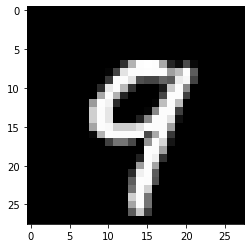

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
9 9


In [98]:
plt.imshow(test_x[12],'gray')
plt.show()
pred = model.predict(test_x[12].reshape(1,28,28,1))
print(pred)
print(test_y[12], np.argmax(pred))